In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int64)  # iris setosa?

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [2]:
y_pred

array([0])

In [3]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

2023-11-27 13:17:02.215817: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-27 13:17:02.215871: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-27 13:17:02.216109: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-27 13:17:02.309432: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


'2.14.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Coat'

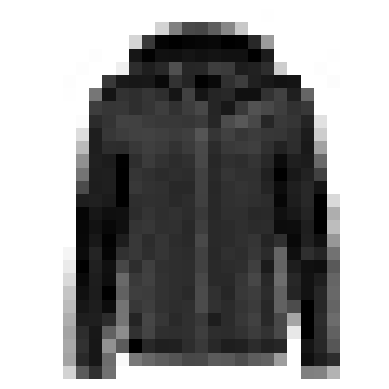

In [10]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [11]:
# to make this notebook's output stable across runs
np.random.seed(42)

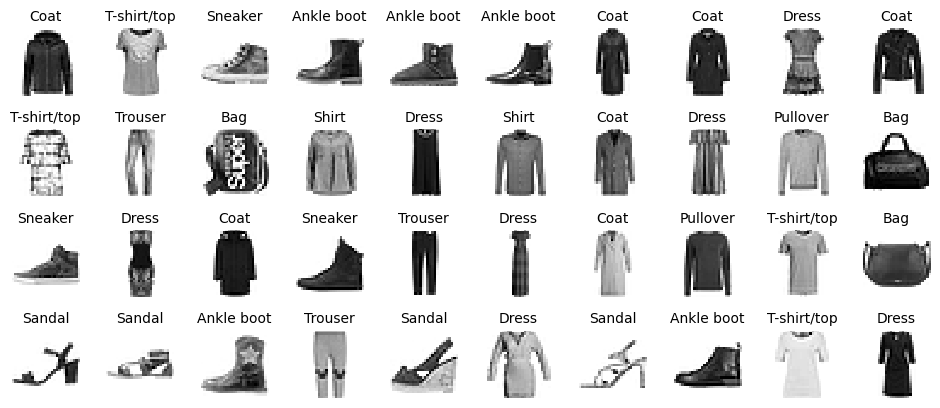

In [12]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=10)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

2023-11-27 13:17:08.270005: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-27 13:17:08.455655: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-27 13:17:08.456254: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.layers

In [16]:
model.layers[3].name

'dense_2'

In [17]:
weights, biases = model.layers[1].get_weights()

In [18]:
weights

array([[-0.03571767, -0.07219853, -0.0158211 , ..., -0.03673733,
        -0.07222272,  0.07394126],
       [ 0.00843242,  0.02364231,  0.03014837, ..., -0.03266498,
        -0.05967072,  0.00101562],
       [-0.00035477, -0.0089836 ,  0.00553976, ..., -0.03198071,
         0.06064445,  0.0305724 ],
       ...,
       [ 0.03874437,  0.02821312,  0.06853794, ..., -0.01421382,
        -0.05833358,  0.02270383],
       [-0.00070327, -0.00850689, -0.04802444, ..., -0.07210735,
        -0.06394033,  0.03260539],
       [ 0.0061953 ,  0.05059964, -0.04237469, ..., -0.02430435,
        -0.05142734,  0.0054695 ]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
biases.shape

(300,)

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [23]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2023-11-27 13:17:12.513345: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5580ac701f70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-27 13:17:12.513373: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 960M, Compute Capability 5.0
2023-11-27 13:17:12.792574: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8800
2023-11-27 13:17:12.874448: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1719/1719 [==============================] - 7s 3ms/step - loss: 0.7125 - accuracy: 0.7690 - val_loss: 0.5095 - val_accuracy: 0.8260
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4841 - accuracy: 0.8321 - val_loss: 0.4418 - val_accuracy: 0.8446
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4391 - accuracy: 0.8466 - val_loss: 0.4218 - val_accuracy: 0.8582
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4126 - accuracy: 0.8552 - val_loss: 0.4013 - val_accuracy: 0.8596
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3926 - accuracy: 0.8606 - val_loss: 0.3843 - val_accuracy: 0.8668
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3770 - accuracy: 0.8684 - val_loss: 0.3716 - val_accuracy: 0.8706
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3643 - accuracy: 0.8712 - val_loss: 0.3533 - val_accuracy: 0.8736
Epo

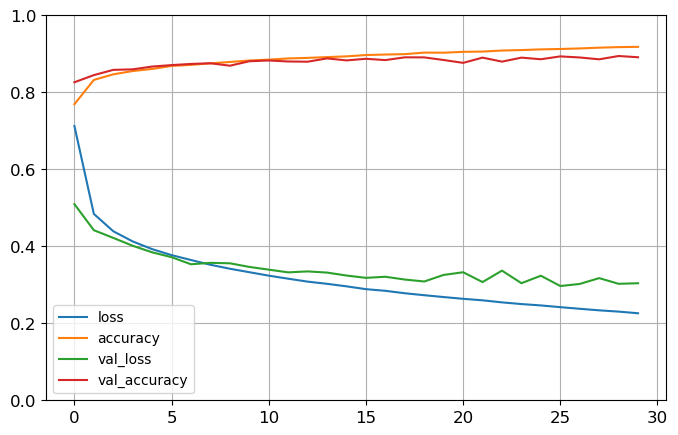

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 67.3250 - accuracy: 0.8391


[67.32499694824219, 0.8391000032424927]

In [26]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2233 - accuracy: 0.9192 - val_loss: 0.2938 - val_accuracy: 0.8936
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2191 - accuracy: 0.9218 - val_loss: 0.3060 - val_accuracy: 0.8896
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2150 - accuracy: 0.9221 - val_loss: 0.3072 - val_accuracy: 0.8908
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2126 - accuracy: 0.9234 - val_loss: 0.2942 - val_accuracy: 0.8946
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2099 - accuracy: 0.9243 - val_loss: 0.3123 - val_accuracy: 0.8900
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2056 - accuracy: 0.9267 - val_loss: 0.2954 - val_accuracy: 0.8942
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2015 - accuracy: 0.9264 - val_loss: 0.2968 - val_accuracy:

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 95.6067 - accuracy: 0.8201


[95.60669708251953, 0.8201000094413757]

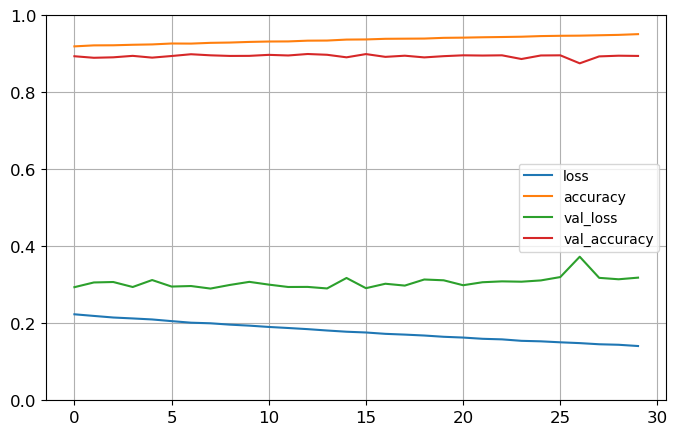

In [28]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

In [31]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 22ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [36]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 21ms/step


array([9, 2, 1])

In [37]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [38]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

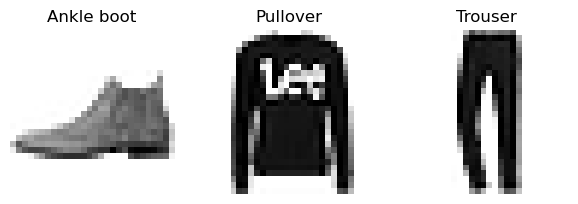

In [39]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
# BUILDING A REGRESSION MLP USING THE SEQUENTIAL API